# COURSE: Improving data quality in data analytics & machine learning
## SECTION: Data transformations
### LECTURE: Code: Transforming data
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dataquality_x/?couponCode=202204

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Z-score scaling

In [4]:
# import the data from the web
url = "https://sincxpress.com/sampledata.csv"
df = pd.read_csv(url)

df.describe()#it's always a good idea to look at the data before starting. df.describe() is a great function

,var1,var2,var3
count,20.000000,20.000000,21.000000
mean,-1.100000,25.450000,4.095238
std,10.356285,29.770128,10.676632
min,-20.000000,-14.000000,-15.000000
25%,-7.750000,10.750000,-5.000000
50%,0.500000,24.000000,3.000000
75%,5.250000,29.500000,12.000000
max,15.000000,129.000000,27.000000


/Users/antonis/miniforge3/envs/env_test/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


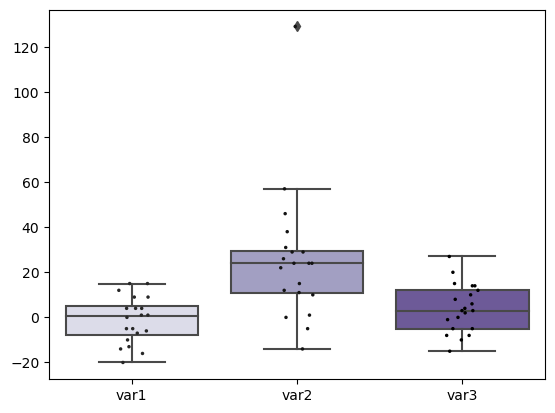

In [5]:
sns.boxplot(data=df, palette='Purples')
sns.stripplot(data=df,marker='.',color='k');

In [8]:
# Now z-score!
df_z = (df - df.mean(skipna=True)) / df.std(ddof=1)
#skipna=True will skip nan values. it's also the default value
#ddof = denominator degrees of freedom
#pandas default is 1. more statistically appropriate
#numpy default is 0

# note: skipna=True is default!

/Users/antonis/miniforge3/envs/env_test/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


,var1,var2,var3
count,2.000000e+01,2.000000e+01,2.100000e+01
mean,1.942890e-17,8.326673e-18,1.776026e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.824979e+00,-1.325154e+00,-1.788508e+00
25%,-6.421222e-01,-4.937836e-01,-8.518827e-01
50%,1.544956e-01,-4.870654e-02,-1.025827e-01
75%,6.131543e-01,1.360424e-01,7.403797e-01
max,1.554612e+00,3.478319e+00,2.145317e+00


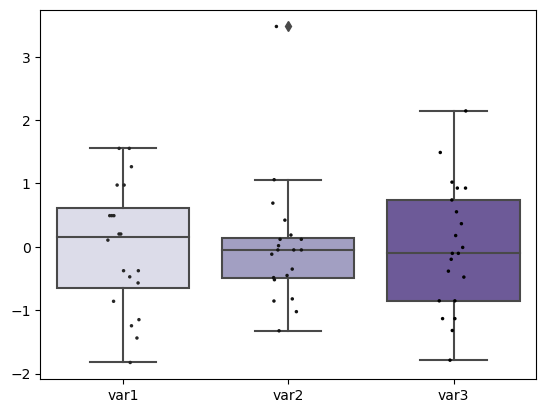

In [9]:
# now describe/plot again

sns.boxplot(data=df_z, palette='Purples')
sns.stripplot(data=df_z,marker='.',color='k')

df_z.describe()

# Min/max scaling

In [12]:
# in pandas
#between 0-1
# start by getting min/max values per column
dmax = df.max()
dmin = df.min()

df_mm = (df-dmin) / (dmax-dmin)

/Users/antonis/miniforge3/envs/env_test/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


,var1,var2,var3
count,20.000000,20.000000,21.000000
mean,0.540000,0.275874,0.454649
std,0.295894,0.208183,0.254206
min,0.000000,0.000000,0.000000
25%,0.350000,0.173077,0.238095
50%,0.585714,0.265734,0.428571
75%,0.721429,0.304196,0.642857
max,1.000000,1.000000,1.000000


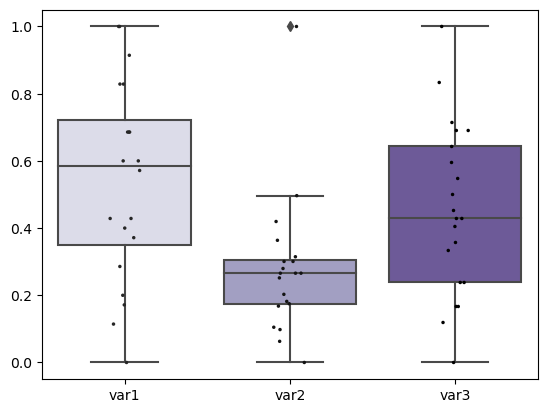

In [13]:
sns.boxplot(data=df_mm, palette='Purples')
sns.stripplot(data=df_mm,marker='.',color='k')
df_mm.describe()

In [29]:
# in scikit-learn
from sklearn.preprocessing import MinMaxScaler

# make some data
data = np.random.randn(500,1)

# create the scalar isntance
#this is a class and we create an instance of that particular class
scalarfun = MinMaxScaler((-.5,17.3))#you can specify the minimum and the maxim value!-.5 is -0.5

# apply it to data
scalarfun.fit(data)
data_s = scalarfun.transform(data)

# print out minimum and maximum values
data_s.min(),data_s.max()

(-0.5, 17.3)

In [ ]:
h = sns.boxplot(data=[data,data_s], palette='Purples')
sns.stripplot(data=[data,data_s],marker='.',color='k')
h.set_xticklabels(['Original','Scaled'])
plt.show()

# Binning

In [33]:
# numpy's histogram

# get the bin counts
bincounts,boundaries = np.histogram(data,bins=2)
#we specify we have 2 bins . the first one has 282 data points and the second one 218
#first bin goes from -3.23002258 to 0.09835621
#second bin goes from 0.09835621 to 3.426735
#that's why we have 3 values here
# (optional) convert to proportion
proportion = bincounts / np.sum(bincounts)

print(boundaries)
print(bincounts)
print(proportion)

[-3.23002258  0.09835621  3.426735  ]
[282 218]
[0.564 0.436]


In [ ]:
# but we need the individual data values...

# specify the bin boundaries
nbins = 5
boundaries = np.linspace( np.min(data),np.max(data)*1.01,nbins+1 )

# bin the data
binvalues = np.digitize(data,boundaries)

# and plot
plt.plot(binvalues,data,'o')
plt.xticks(np.arange(1,nbins+1))
plt.xlim([0,nbins+1])
plt.xlabel('Binned values')
plt.ylabel('Original values')
plt.show()

# Unit normalization

In [ ]:
# in numpy

# get the data norm
norm = np.linalg.norm(data)
print(f'Original data norm: {norm:.3f}')

# norm the data
data_u = data / norm
print(f'Unit-normed data norm: {np.linalg.norm(data_u):.3f}')


# and plot
plt.plot(data,data_u,'o')
plt.xlabel('Original')
plt.ylabel('Unit-normed')
plt.title(f'Correlation: {np.corrcoef(data.T,data_u.T)[0,1]}')
plt.show()

In [ ]:
# in pandas

# uh oh...
norms = np.linalg.norm(df)
norms

In [ ]:
# do it manually
norms = np.sqrt(np.sum(np.square(df)))
norms

df_u = df.divide(norms)
df_u

# Rank transform

In [ ]:
# in scipy
from scipy.stats import rankdata

data_rank = rankdata(data)

fig,axs = plt.subplots(1,2,figsize=(15,6))

axs[0].plot(np.sort(data,axis=0),'o')
axs[0].set_title('Sorted original data')
axs[0].set_xlabel('Data index')
axs[0].set_ylabel('Data value')

axs[1].plot(np.sort(data_rank),'o')
axs[1].set_title('Sorted rank-transformed data')
axs[1].set_xlabel('Data index')
axs[1].set_ylabel('Data value')

plt.show()

In [ ]:
# in pandas

df.rank()